# nzip the dataset

In [2]:
!unzip "/content/Potato Diseases data set.zip"

Archive:  /content/Potato Diseases data set.zip
   creating: Potato Diseases data set/
   creating: Potato Diseases data set/PlantVillage/
   creating: Potato Diseases data set/PlantVillage/Potato___Early_blight/
  inflating: Potato Diseases data set/PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG  
  inflating: Potato Diseases data set/PlantVillage/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG  
  inflating: Potato Diseases data set/PlantVillage/Potato___Early_blight/009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG  
  inflating: Potato Diseases data set/PlantVillage/Potato___Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG  
  inflating: Potato Diseases data set/PlantVillage/Potato___Early_blight/0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG  
  inflating: Potato Diseases data set/PlantVillage/Potato___Early_blight/02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Ea

In [3]:
# ! pip install tensorflow

In [78]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np





In [79]:
dataset  = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Potato Diseases data set/PlantVillage",
    shuffle = True,
    image_size = (256,256),
    batch_size = 32


 )

Found 2152 files belonging to 3 classes.


In [80]:
class_name = dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [81]:
len(dataset)

68

# size of image

In [82]:
for image_batch,label_batch in dataset.take(1):
  print(image_batch.shape)
  # print(image_batch[0].numpy())

(32, 256, 256, 3)


In [83]:
for image_size,label in dataset.take(1):
  print(image_size)

tf.Tensor(
[[[[163. 161. 174.]
   [156. 154. 167.]
   [147. 145. 158.]
   ...
   [180. 178. 189.]
   [186. 184. 195.]
   [164. 162. 173.]]

  [[155. 153. 166.]
   [156. 154. 167.]
   [156. 154. 167.]
   ...
   [165. 163. 174.]
   [178. 176. 187.]
   [166. 164. 175.]]

  [[152. 150. 163.]
   [156. 154. 167.]
   [158. 156. 169.]
   ...
   [167. 165. 176.]
   [187. 185. 196.]
   [181. 179. 190.]]

  ...

  [[106. 100. 110.]
   [168. 162. 172.]
   [121. 115. 125.]
   ...
   [102.  99. 110.]
   [149. 146. 157.]
   [149. 146. 157.]]

  [[ 97.  91. 101.]
   [137. 131. 141.]
   [124. 118. 128.]
   ...
   [126. 123. 134.]
   [ 99.  96. 107.]
   [138. 135. 146.]]

  [[153. 147. 157.]
   [137. 131. 141.]
   [110. 104. 114.]
   ...
   [ 92.  89. 100.]
   [115. 112. 123.]
   [161. 158. 169.]]]


 [[[117. 107. 118.]
   [112. 102. 113.]
   [110. 100. 111.]
   ...
   [142. 132. 143.]
   [143. 133. 144.]
   [144. 134. 145.]]

  [[115. 105. 116.]
   [110. 100. 111.]
   [109.  99. 110.]
   ...
   [144. 1

## Calculate Prediction Accuracy

### Subtask:
Compare the predicted classes with the actual classes and calculate the accuracy.

**Reasoning**:
Compare the predicted classes to the actual classes and calculate the percentage of correct predictions.

In [84]:
# Extract actual classes from the image paths
actual_classes = [os.path.basename(os.path.dirname(image_path)) for image_path in new_image_paths]

# Calculate accuracy
correct_predictions = sum([1 for actual, predicted in zip(actual_classes, predicted_classes) if actual == predicted])
total_predictions = len(new_image_paths)
accuracy = (correct_predictions / total_predictions) * 100

print(f"Overall Prediction Accuracy: {accuracy:.2f}%")

Overall Prediction Accuracy: 46.47%


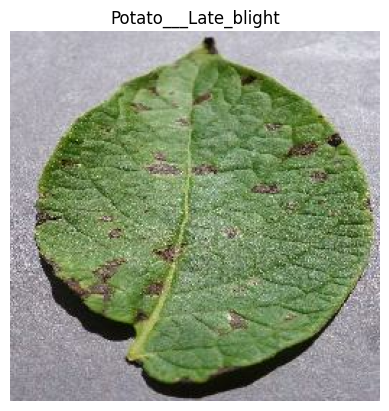

In [85]:
for image_size,label in dataset.take(1):
 plt.imshow(image_batch[4].numpy().astype("uint8"))
 plt.title(class_name[label_batch[0]])
 plt.axis("off")

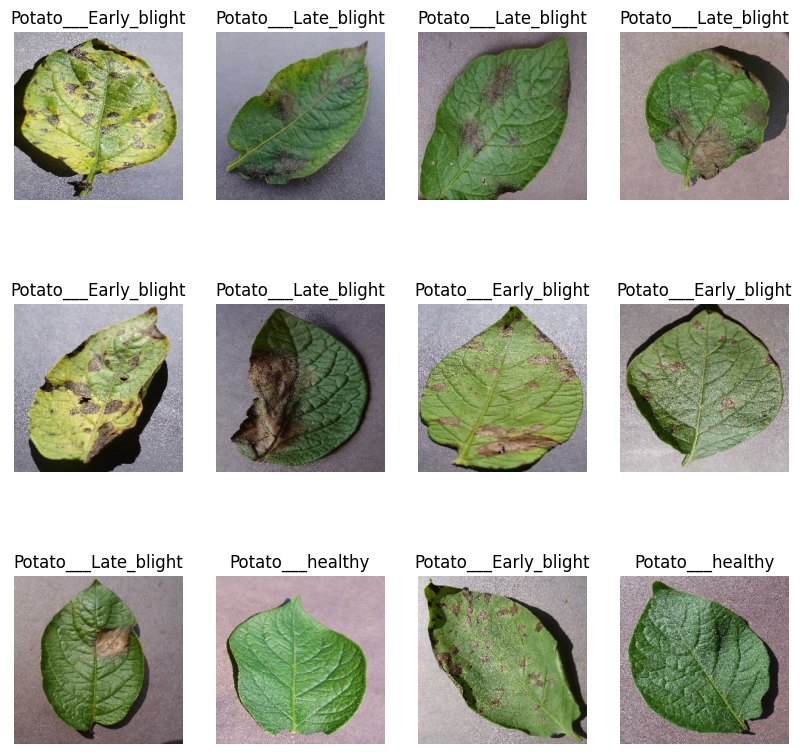

In [86]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[labels_batch[i]])
        plt.axis("off")

#train test model

In [87]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

train

In [88]:
train_ds=dataset.take(54)
len(train_ds)

54

test

In [89]:
test_ds = dataset.skip(54)
len(test_ds)
test_ds = test_ds.take(8)
len(test_ds)

8

validation

In [90]:
val_size = 0.1
len(dataset)*val_size
val_ds = test_ds.take(6)
len(val_ds)

6

In [91]:
print(len(train_ds))
print(len(test_ds))
print(len(val_ds))

54
8
6


# shuffle

In [92]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [93]:
IMAGE_SIZE = 256
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
]
)

Data Augementation

In [94]:
data_augmnet = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
]
)

In [95]:
train_ds = train_ds.map(
    lambda x, y: (data_augmnet(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [96]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_name)

In [97]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [98]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 385ms/step - accuracy: 0.4826 - loss: 0.9150 - val_accuracy: 0.7500 - val_loss: 0.6149
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 346ms/step - accuracy: 0.7532 - loss: 0.5988 - val_accuracy: 0.8594 - val_loss: 0.3742
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 18s 335ms/step - accuracy: 0.8791 - loss: 0.3242 - val_accuracy: 0.9271 - val_loss: 0.2226
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 348ms/step - accuracy: 0.9453 - loss: 0.1608 - val_accuracy: 0.9375 - val_loss: 0.2144
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 18s 337ms/step - accuracy: 0.9211 - loss: 0.2243 - val_accuracy: 0.9062 - val_loss: 0.2696
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 347ms/step - accuracy: 0.9659 - loss: 0.0974 - val_accuracy: 0.9167 - val_loss: 0.2627
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 18s 337ms/step - accuracy: 0.9553 - loss: 0.1236 - val_accuracy: 0.9583 - val_loss: 0.1265
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 346ms/step - accuracy: 0.9651 - loss: 0.0944 - val_accu

In [100]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9893 - loss: 0.0295


In [101]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

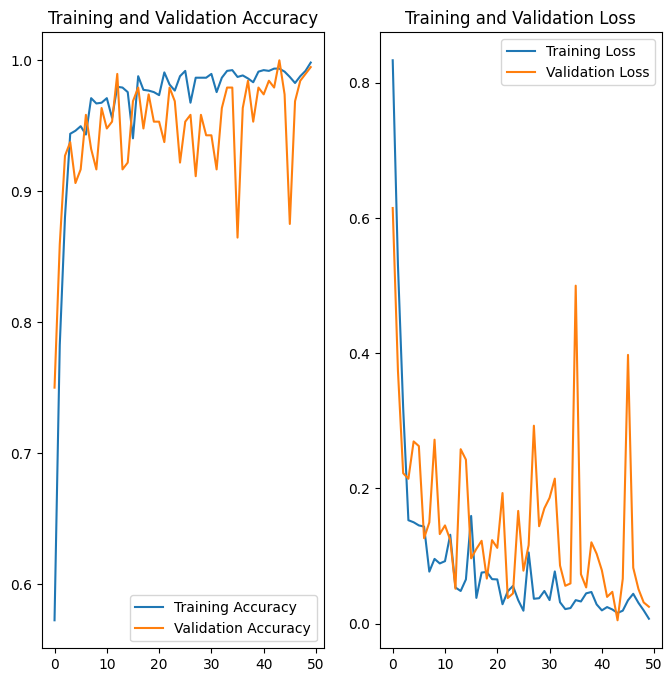

In [102]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [103]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


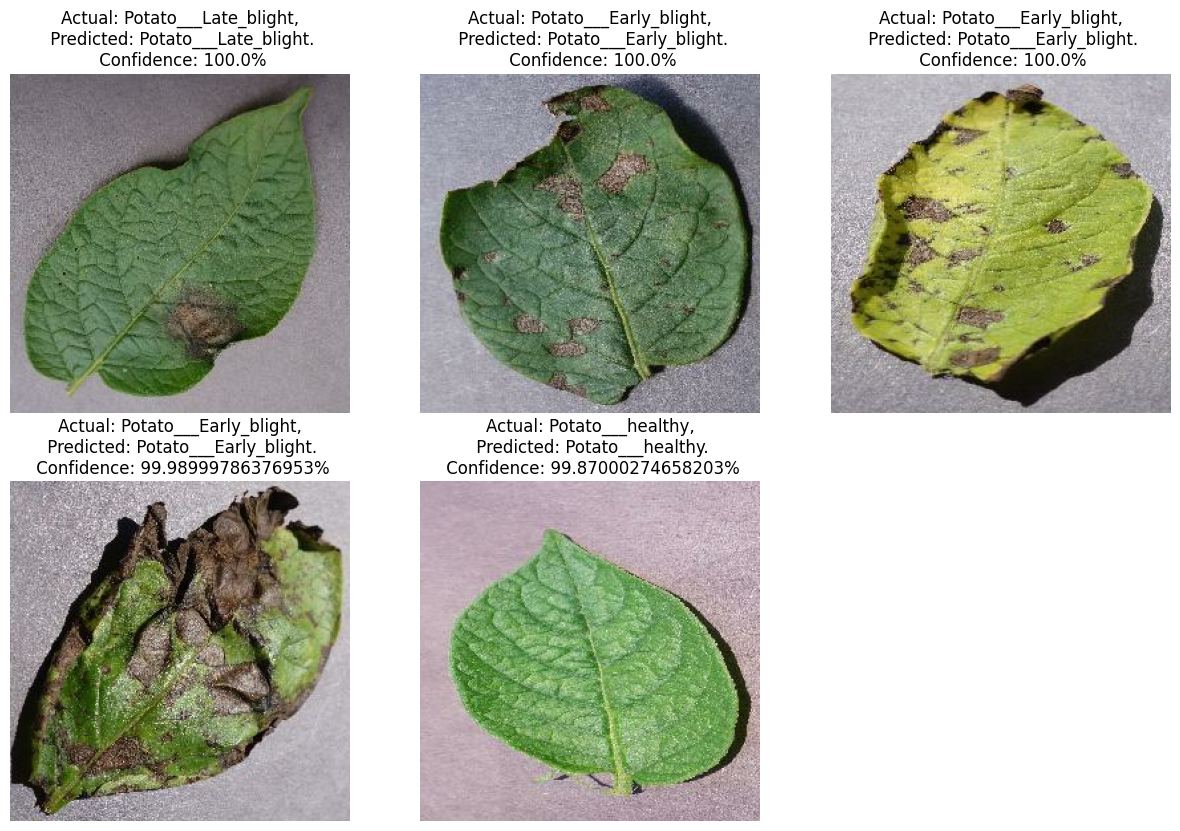

In [106]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [105]:
model.save("potato_diseases.keras")